In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import math
from google.colab import files

uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [15]:
# 데이터 읽기
df = pd.read_excel('202501.xlsx')

In [16]:
# 날짜 컬럼 datetime 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'], errors='coerce')

In [17]:
# 금속 컬럼 추출 (ng/m3)
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

In [39]:
# PM2.5 음수값 Non 처리
if 'Conc(ug/m3)' in df.columns:
    df['Conc(ug/m3)'] = df['Conc(ug/m3)'].apply(lambda x: x if x >= 0 else None)

# 금속 음수값 결측치 처리
df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)

/tmp/ipython-input-3678814035.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[metal_columns] = df[metal_columns].applymap(lambda x: x if x >= 0 else None)


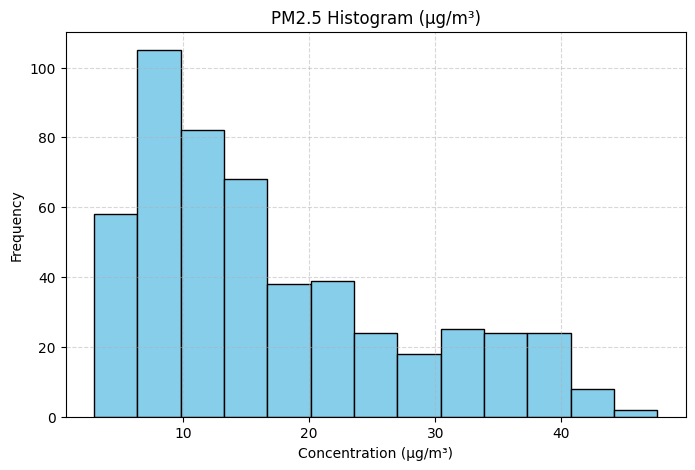

In [40]:
# PM2.5 히스토그램 그리기
plt.figure(figsize=(8, 5))
plt.hist(df['Conc(ug/m3)'].dropna(), bins='auto', edgecolor='black', color='skyblue')
plt.title("PM2.5 Histogram (µg/m³)")
plt.xlabel("Concentration (µg/m³)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)


# 그래프 출력
plt.show()